In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\plane\Home\Desktop\ML_Project\week3\hepatitis.csv')
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [3]:
threshold=0.4
print(df.shape)
df=df[df.columns[df.isnull().mean()<threshold]]
df.shape

(155, 20)


(155, 19)

In [5]:
df=df.loc[df.isnull().mean(axis=1)<threshold]
df.shape

(154, 19)

In [6]:
df.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'histology',
       'class'],
      dtype='object')

In [9]:
df=df.drop('class',axis=1)
df.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'histology'],
      dtype='object')

In [10]:
df['bilirubin']=df['bilirubin'].fillna(df['bilirubin'].median())

In [12]:
df=pd.DataFrame({'hrs':[1,4,2,8,9,3,5,7,6,10],
                 'score':[1,3,3,7,8,3,6,5,7,10]})
df.to_csv('lab_hrs.csv')

In [14]:
#Pedhazur
num_b1=np.sum((df['hrs']-df['hrs'].mean())*(df['score']-df['score'].mean()))
den_b1=np.sum((df['hrs']-df['hrs'].mean())**2)
b1=num_b1/den_b1
b1

0.8666666666666667

In [15]:
b0=df['score'].mean()-(df['hrs'].mean()*b1)
b0

0.5333333333333332

In [19]:
df['pedhazur_pred']=b0+(b1*df['hrs'])
df['pedhazur_pred']=df['pedhazur_pred'].round(2)
df[['hrs','pedhazur_pred','score']]

,hrs,pedhazur_pred,score
0,1,1.40,1
1,4,4.00,3
2,2,2.27,3
3,8,7.47,7
4,9,8.33,8
5,3,3.13,3
6,5,4.87,6
7,7,6.60,5
8,6,5.73,7
9,10,9.20,10


In [20]:
mse=np.sum((df['pedhazur_pred']-df['score'])**2)/len(df)
mse

0.8129399999999999

In [21]:
rmse=mse**0.5
rmse

0.9016318539182164

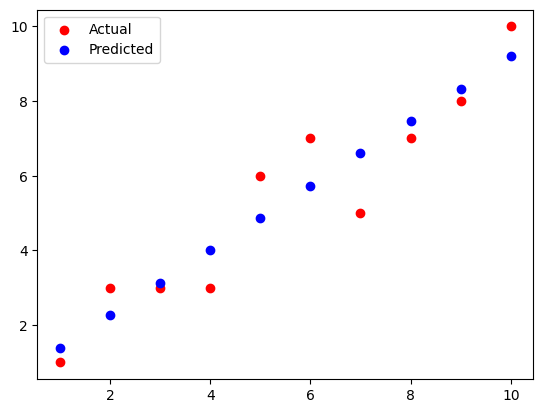

In [23]:
plt.scatter(df['hrs'],df['score'],color='red',marker='o',label='Actual')
plt.scatter(df['hrs'],df['pedhazur_pred'],color='blue',marker='o',label='Predicted')
plt.legend()

In [24]:
n=len(df)
xi_sum=np.sum(df['hrs'])

xi_sq_sum=np.sum(df['hrs']**2)

yi_sum=np.sum(df['score'])
xy_sum=np.sum(df['hrs']*df['score'])

matA=np.array(([n,xi_sum],
               [xi_sum,xi_sq_sum]))

matB=np.array(([yi_sum],
              [xy_sum]))

coeffs=np.linalg.inv(matA)@matB

coeffs

array([[0.53333333],
       [0.86666667]])